In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr
from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os
from scipy.stats import combine_pvalues


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [3]:
# snoRNA mix 
all_file_paths = [WT_YPD, mutant452, mutant451, mutant448_2, MIX_2] 
all_labels = ["1WT_YPD", "2mutant452", "3mutant451", "5mutant448", "4MIX_2"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


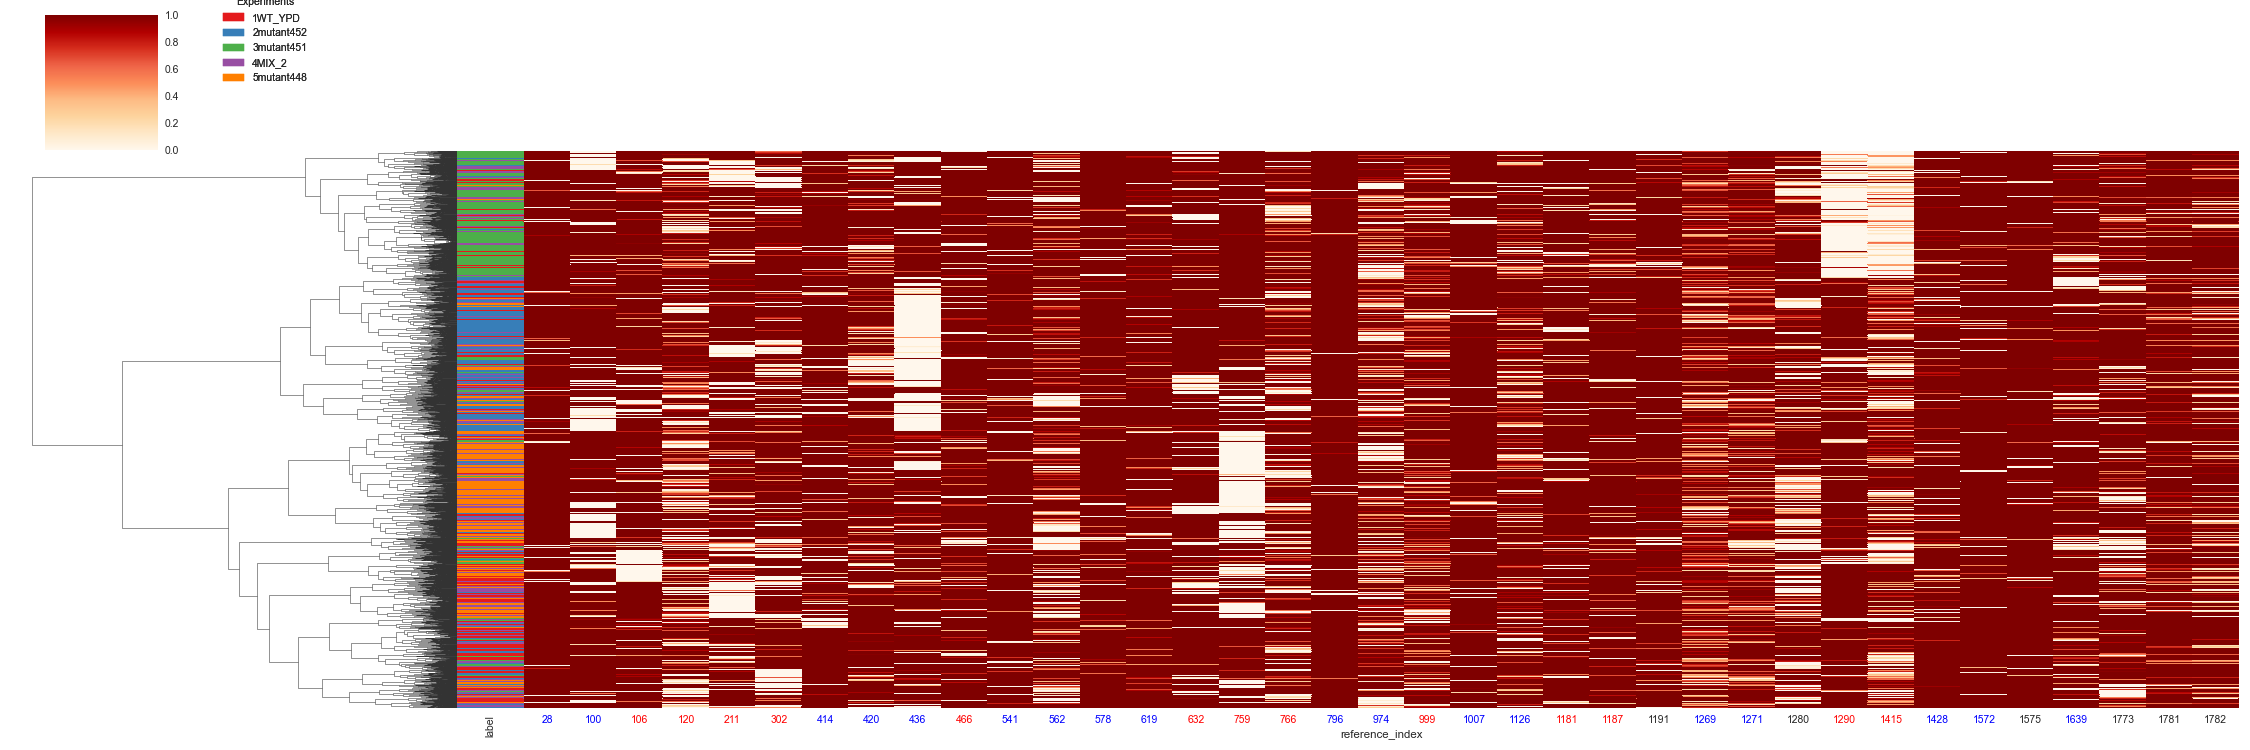

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


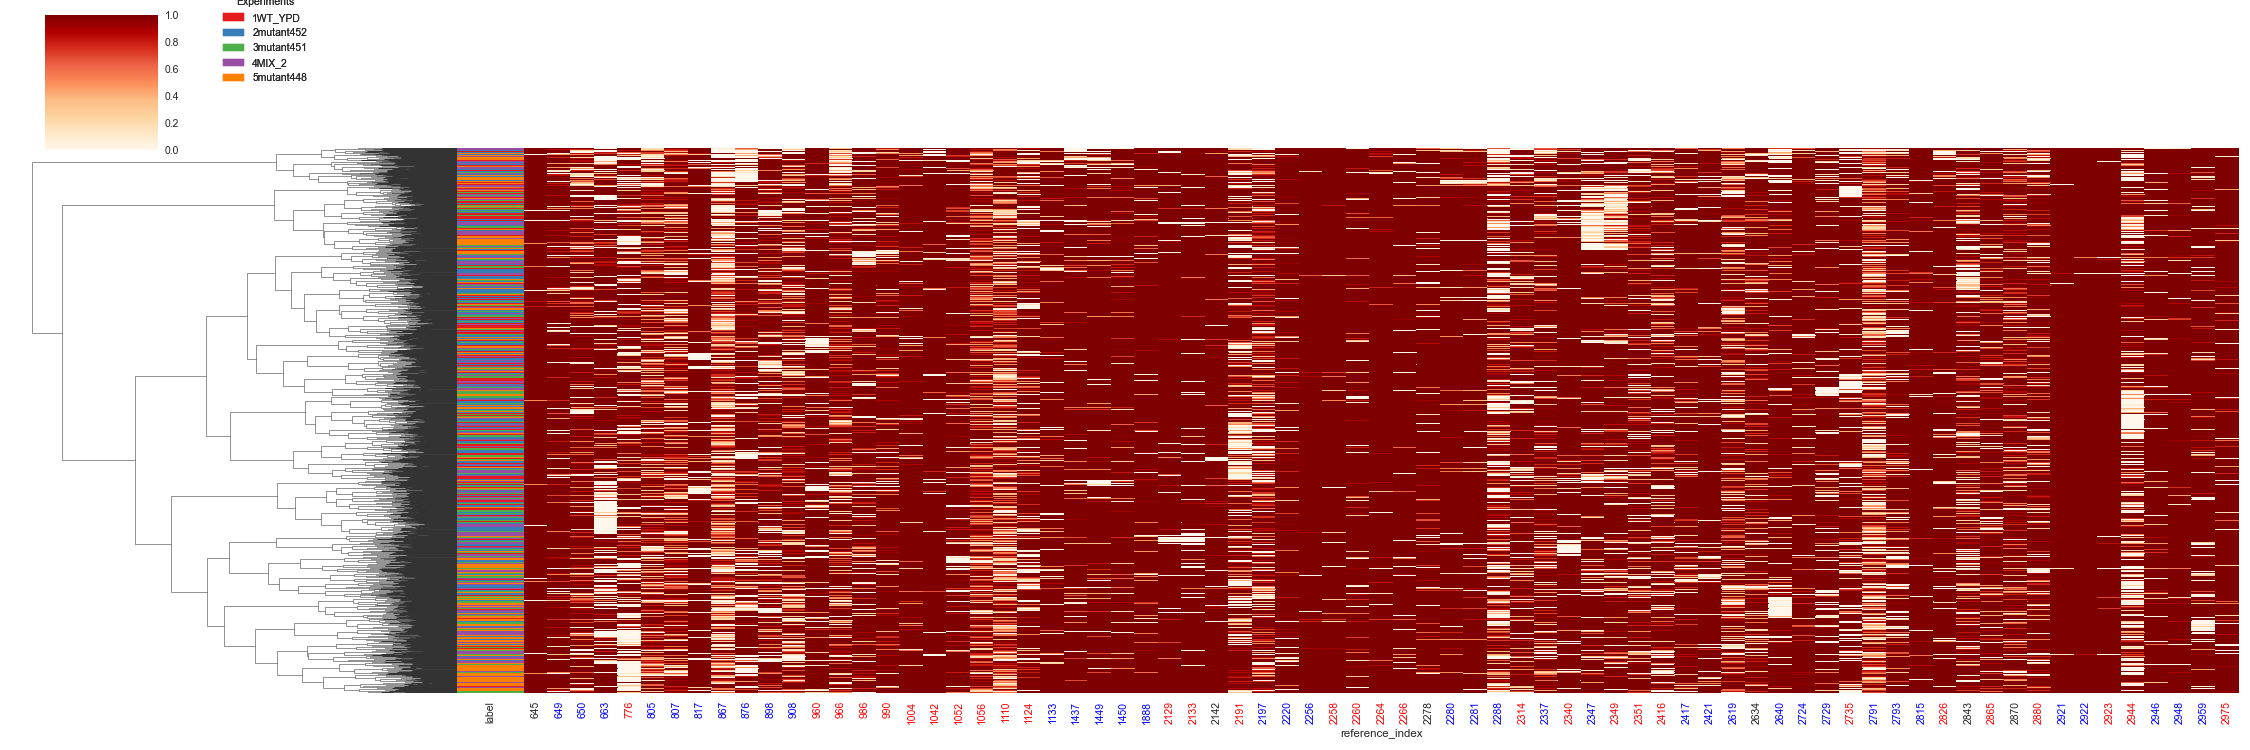

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [27]:
%matplotlib notebook

n = 500
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/sno_rna_knockouts").mkdir(parents=True, exist_ok=True)

for contig in contigs:
#     save_fig_path = None
    save_fig_path = f"figures/sno_rna_knockouts/{contig}_mix_dendrogram.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=True,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)


<IPython.core.display.Javascript object>


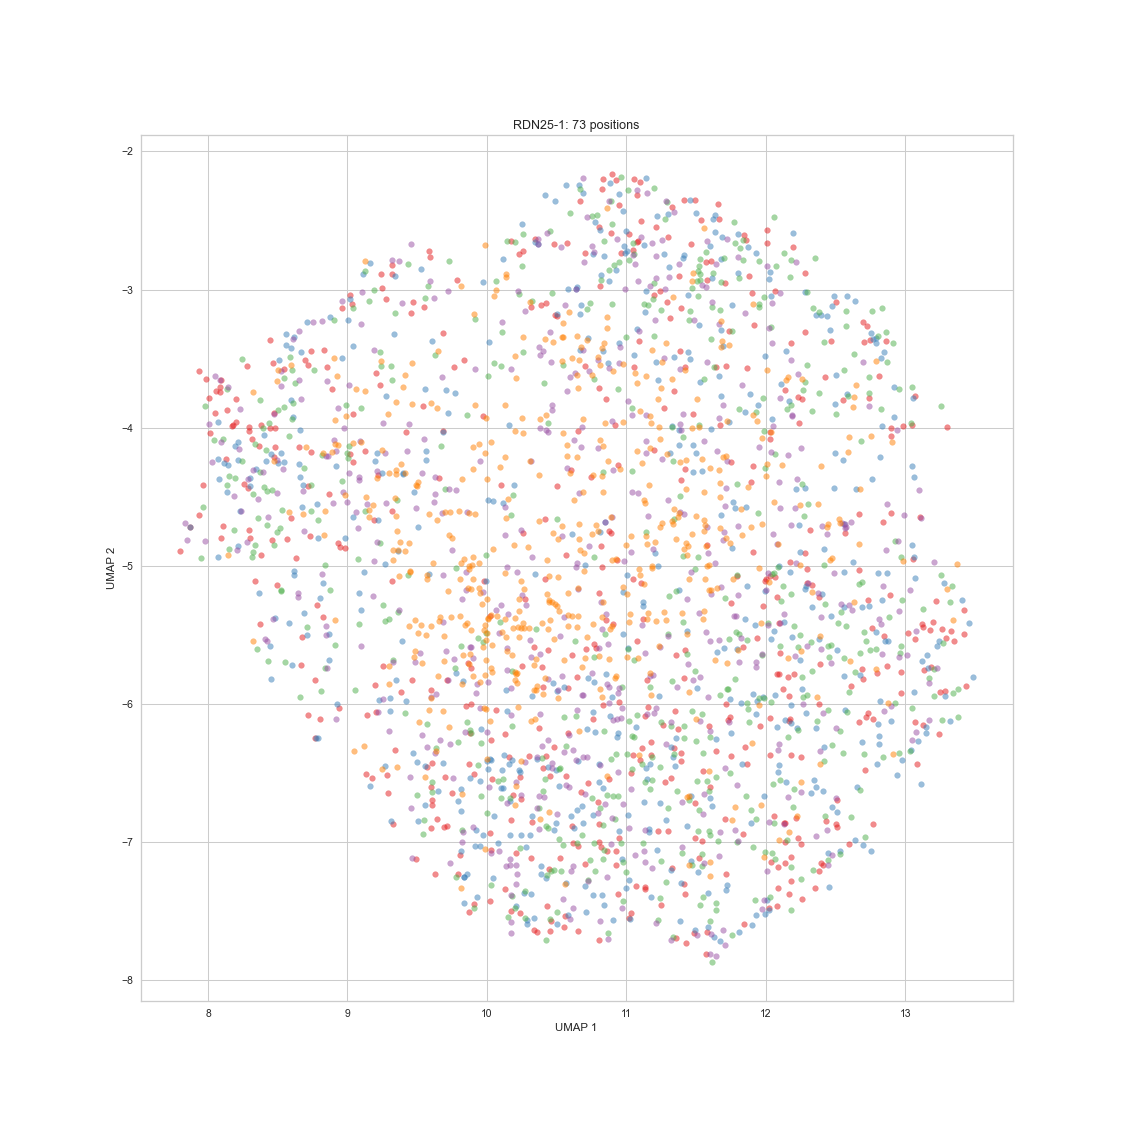

<IPython.core.display.Javascript object>


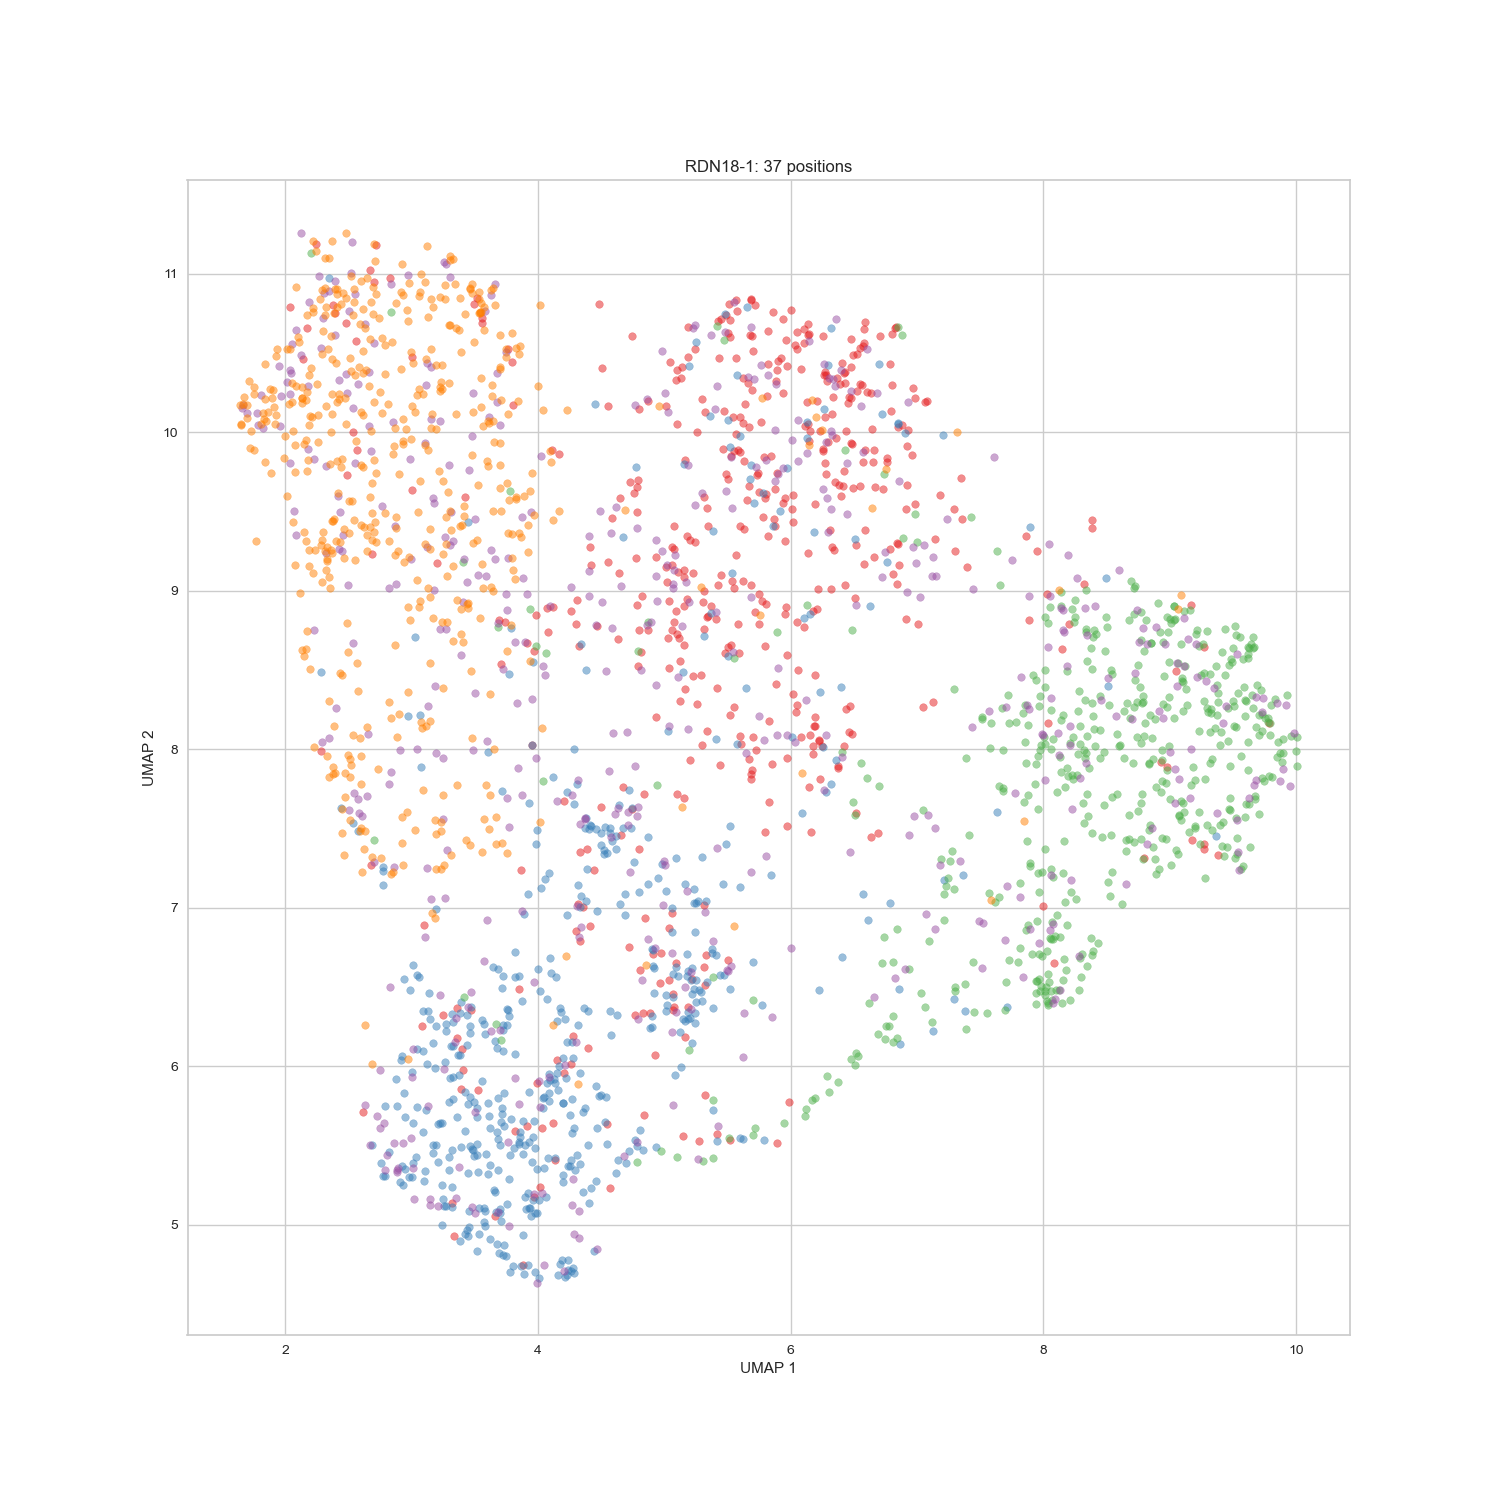

In [28]:
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    n_components = 2
    n = 500
    save_fig_path = None
    legend = False
    other_params = {"alpha": 0.5, "s": 30}
    save_fig_path = f"figures/sno_rna_knockouts/{contig}_mix_umap.png"
    # save_fig_path = None
    vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

<IPython.core.display.Javascript object>


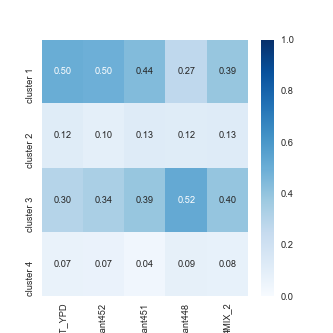

<IPython.core.display.Javascript object>


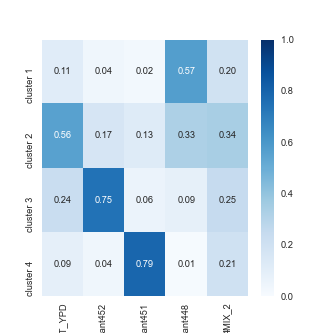

In [29]:
def get_count(count, label):
    if hasattr(count, label):
        return getattr(count, label)
    else:
        return 0

n=500
metric = "euclidean"
method = "ward"
n_clusters = 4
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    X = vc.get_X(contig, vc.get_contig_positions(contig), n=n)
    Z = linkage(X, method=method, metric=metric)
    cut = cut_tree(Z, n_clusters=n_clusters)
    clusters = np.array([x[0]+1 for x in cut])
    plot_me = []
    for i in range(1, 5):
        cluster_counts = []
        counts = X[clusters == i].index.get_level_values(1).value_counts()
        for label in all_labels:
            cluster_counts.append(get_count(counts, label))
        plot_me.append(cluster_counts)
    data = pd.DataFrame(plot_me, columns=all_labels, index=[f"cluster {i}" for i in range(1, 5)])
    # plot
    f, ax = plt.subplots(figsize=(5, 5))
    figure_path = f"figures/sno_rna_knockouts/{contig}_mix_fraction.svg"

    percents = (data / data.sum())
    ax = sns.heatmap(percents, cmap="Blues", annot=True, fmt=".2f", vmin=0, vmax=1)

    if figure_path is not None:
#         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
        plt.savefig(figure_path, dpi=1000)
    else:
        plt.show()

In [4]:
all_file_paths = [WT_YPD, snR4d_alpha_YPD, mutant452, mutant451, mutant448_2, snR45d_YPD, MIX_2] 
all_labels = ["9WT_YPD", "1snR4d_alpha_YPD", "2mutant452", "3mutant451", "4mutant448", "5snR45d_YPD", "6MIX_2"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


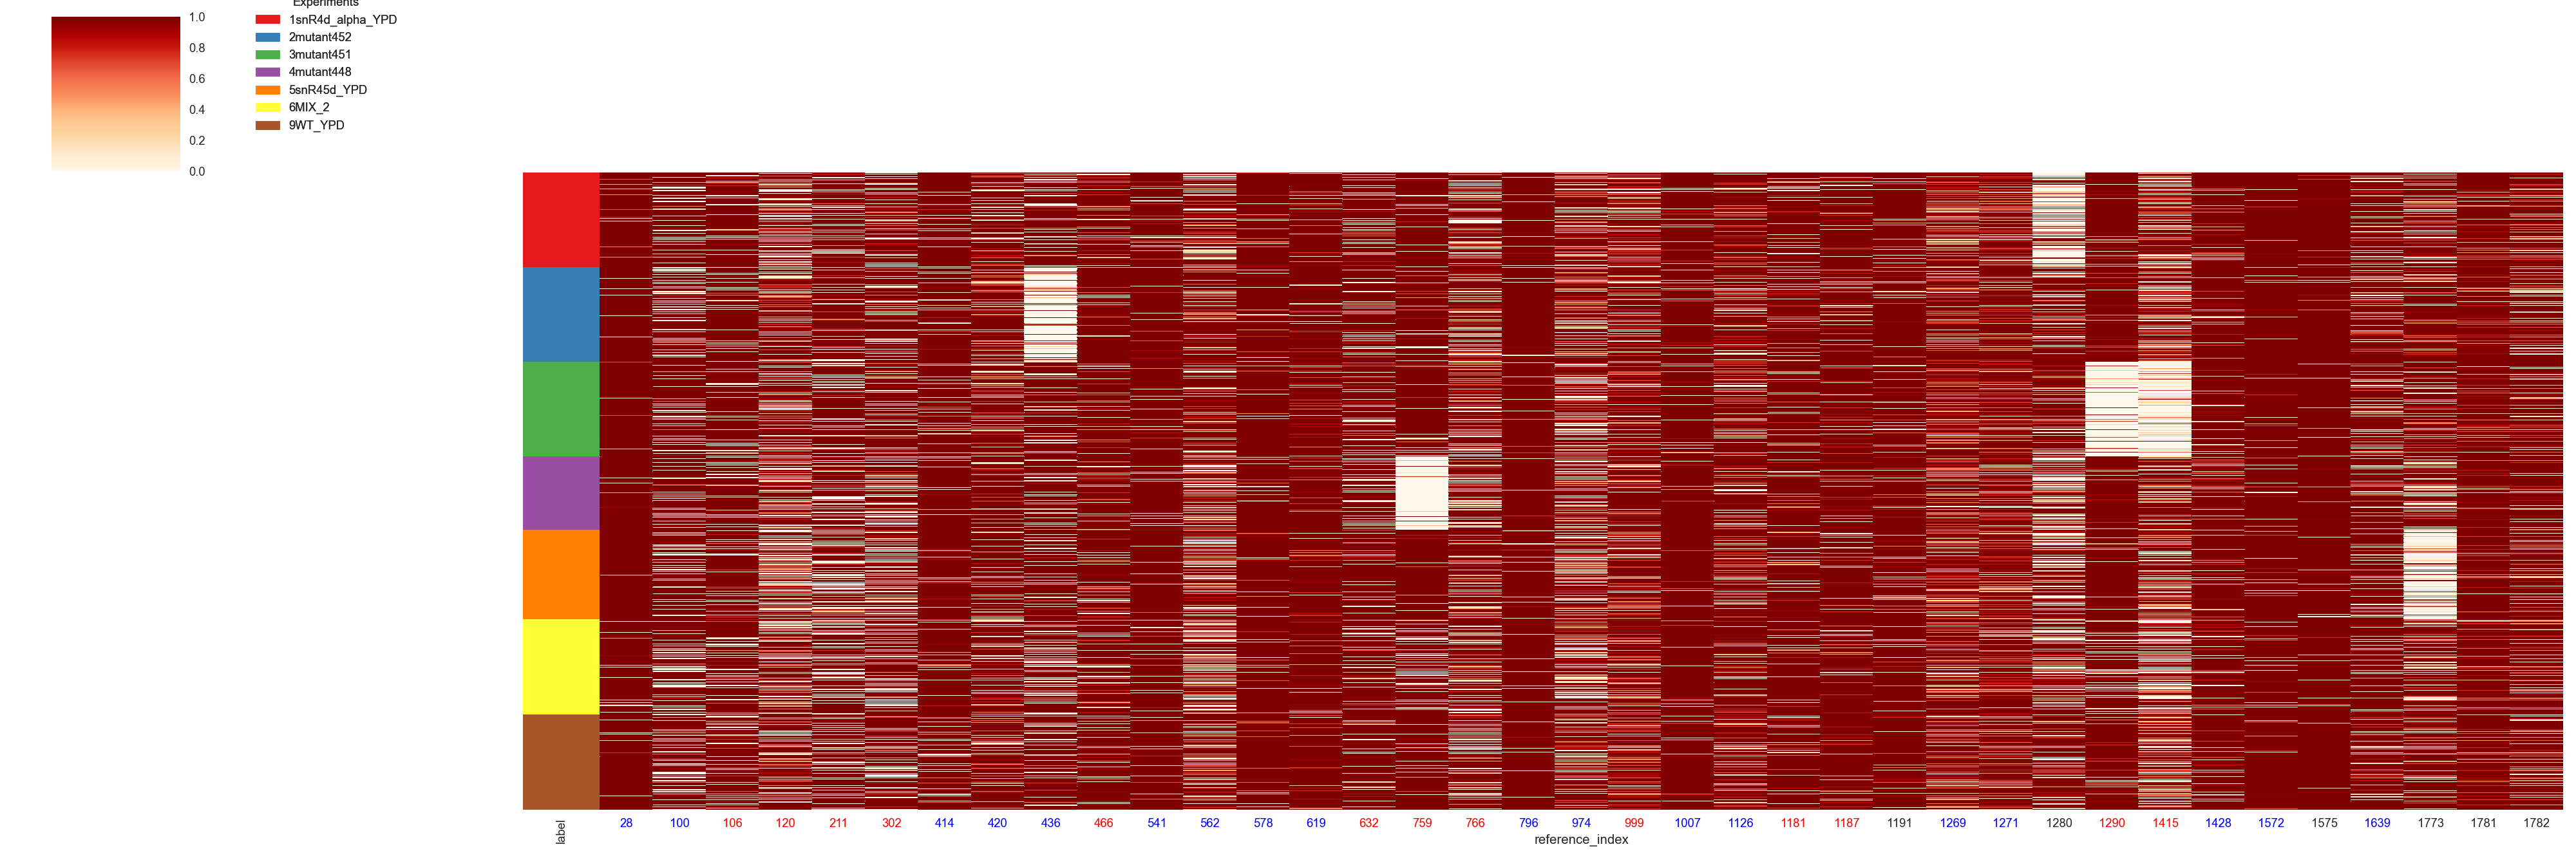

<IPython.core.display.Javascript object>


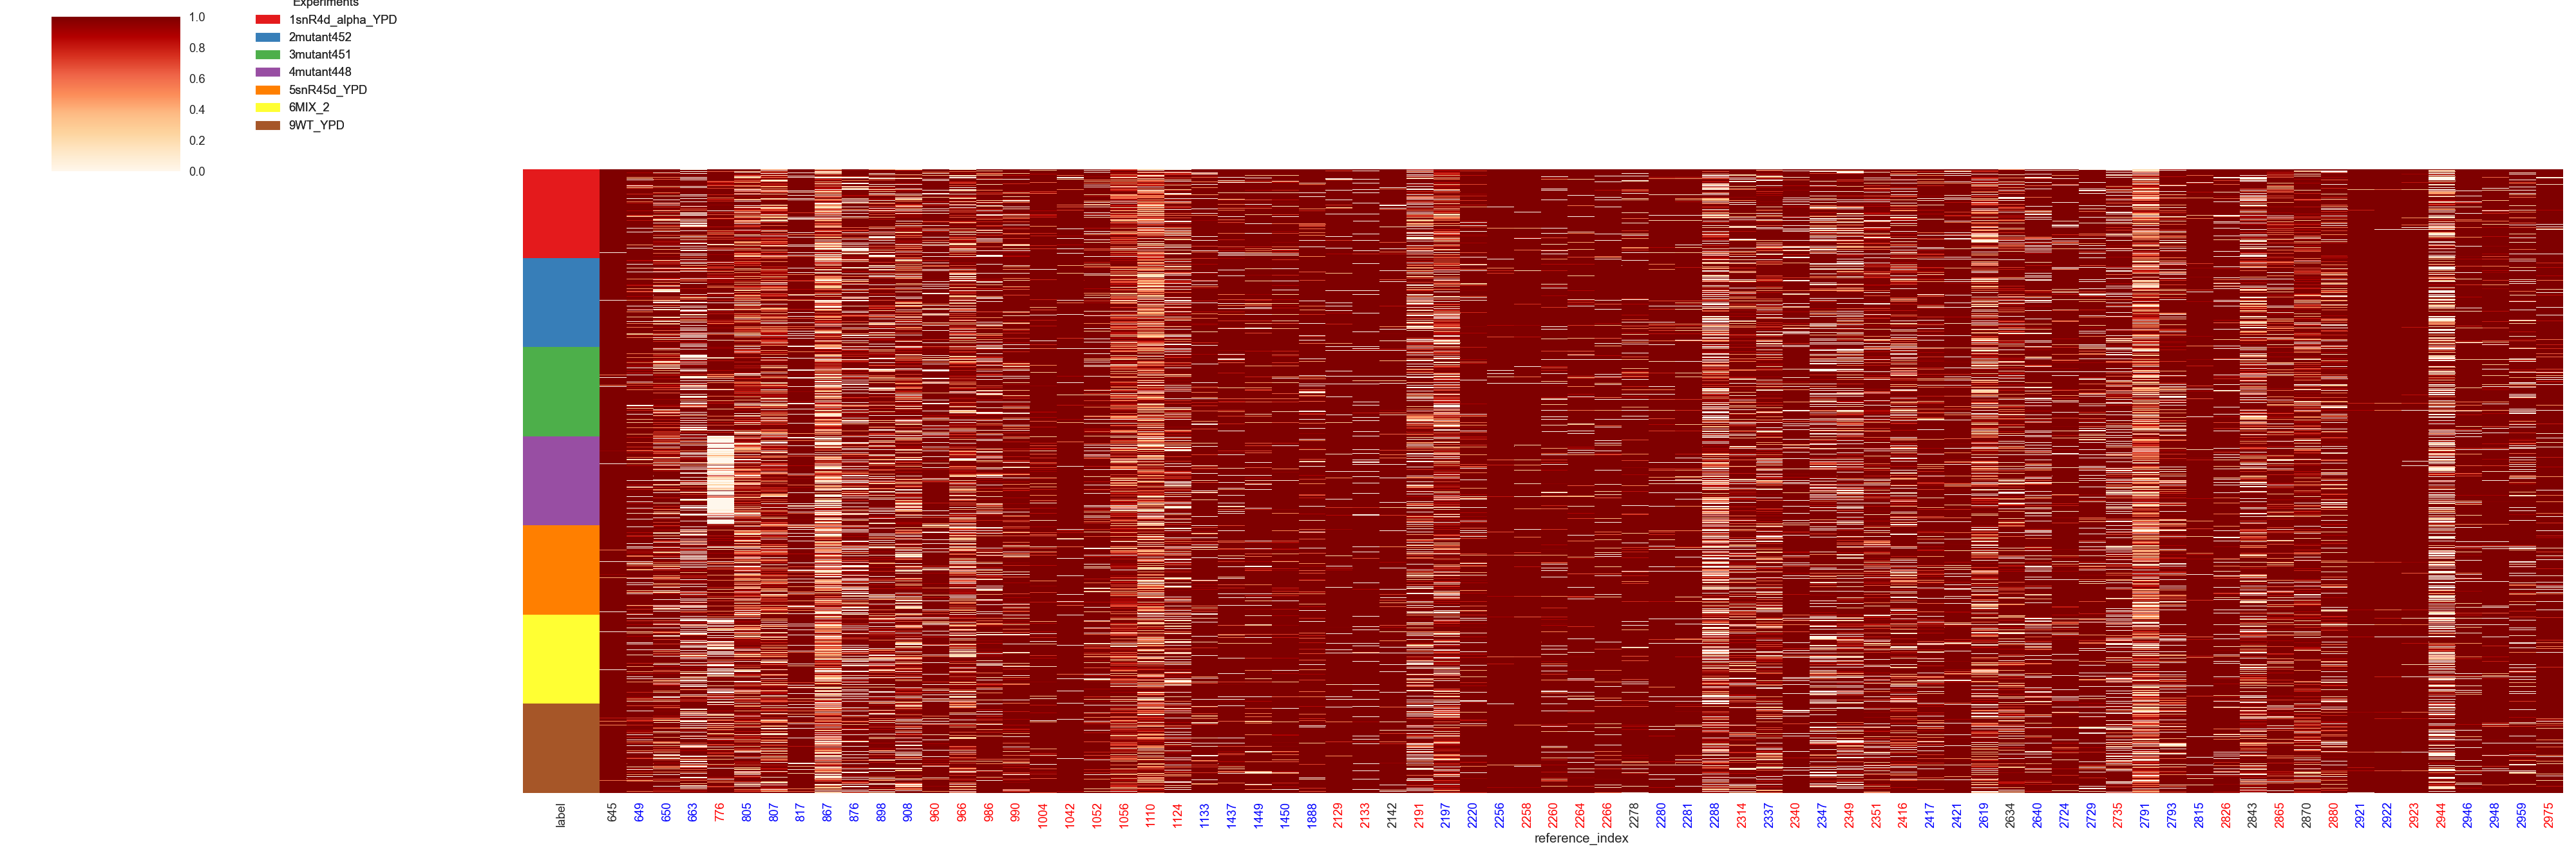

In [7]:

%matplotlib notebook

n = 1500
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
ns = [1500, 500]
for contig, n in zip(contigs, ns):
#     save_fig_path = None
    save_fig_path = f"figures/sno_rna_knockouts/{contig}_snoRNA_heatmap.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=False,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)


In [14]:
all_file_paths = [snR4d_YPD, mutant452, mutant451, mutant448_2, snR45d_YPD, WT_YPD, MIX_2] 
all_labels = ["snR4d_YPD", "mutant452", "mutant451", "mutant448", "snR45d_YPD", "WT_YPD", "MIX_2"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


In [15]:
contig = "RDN18-1"
snr80_18 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant448")
snr83_18 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant451")
snr87_18 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant452")
snr45_18 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="snR45d_YPD")
snr4_18 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="snR4d_YPD")

contig = "RDN25-1"
snr80_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant448")
snr83_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant451")
snr87_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="mutant452")
snr45_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="snR45d_YPD")
snr4_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="snR4d_YPD")


print(((1-snr80_18[758]) + snr83_18[758] + snr87_18[758] + snr45_18[758] + snr4_18[758] +
       snr80_18[1289] + (1 - snr83_18[1289]) + snr87_18[1289] + snr45_18[1289] + snr4_18[1289] +
       snr80_18[1414] + (1- snr83_18[1414]) + snr87_18[1414] + snr45_18[1414] + snr4_18[1414] +
       snr80_18[435] + snr83_18[435] + (1 - snr87_18[435]) + snr45_18[435] + snr4_18[435] +
       (1-snr80_25[775]) + snr83_25[775] + snr87_25[775] + snr45_25[775] + snr4_25[775] +
       snr80_18[1279] + snr83_18[1279] + snr87_18[1279] + snr45_18[1279] + (1-snr4_18[1279]) +
       snr80_18[1772] + snr83_18[1772] + snr87_18[1772] + (1-snr45_18[1772]) + snr4_18[1772]) / 35)

contig = "RDN25-1"
wt_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="WT_YPD")
mix_25 = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="MIX_2")
print(wt_25[775] - mix_25[775])

0.8366659903960635
0.198819486819364


In [ ]:
print(len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"), label="6MIX_2")))
print(len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"), label="6MIX_2")))


In [1]:
pos = [436, 759, 1290, 1415]

In [18]:
from scipy.stats import combine_pvalues
correlation_data = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv", 
                               index_col=0)
mix_pvalues = []
other_pvalues = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]
    ref_index2 = data["ref_index2"]
    if ref_index1 in pos and ref_index2 in pos:
        print(ref_index1, ref_index2)
        mix_pvalues.append(correlation_data["MIX_2_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["MIX_2_corrected_wt_comparison_pvalue"].iloc[index])



436 759
436 1290
436 1415
759 1290
759 1415
1290 1415


In [7]:
mix_pvalues

[3.9306480755484244e-07,
 5.647542777788835e-09,
 9.219231002510059e-07,
 9.701089241664235e-32,
 6.8283183459001245e-12,
 4.7289262424119964e-73]

In [11]:
statistic, pvalue = combine_pvalues(mix_pvalues[:-1])
print(statistic, pvalue)


289.51713628260126 2.550360319432941e-56


In [21]:
correlation_data["CBF5GLU_corrected_pvalue"]

0       0.039862
1       0.788688
2       0.900637
3       0.885202
4       0.512036
          ...   
3289    0.718015
3290    0.899728
3291    0.876621
3292    0.936567
3293    0.473751
Name: CBF5GLU_corrected_pvalue, Length: 3294, dtype: float64

In [12]:
chi2_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)


In [16]:
chi2_pvalues_df["MIX_2_corrected_pvalue"][776]

5.940111061816563e-38

# Percent Mod

In [3]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2_and_batch_effects.csv", index_col=0)

In [4]:
corrected_pvalues_df

,contig,CBF5GAL_mean,CBF5GAL_pvalue,CBF5GAL_corrected_pvalue,CBF5GAL_corrected_batch_effect_prob,CBF5GLU_mean,CBF5GLU_pvalue,CBF5GLU_corrected_pvalue,CBF5GLU_corrected_batch_effect_prob,NOP58GAL_mean,...,snR45d_YPD_corrected_pvalue,snR45d_YPD_corrected_batch_effect_prob,mutant448_2_mean,mutant448_2_pvalue,mutant448_2_corrected_pvalue,mutant448_2_corrected_batch_effect_prob,snR4d_alpha_YPD_mean,snR4d_alpha_YPD_pvalue,snR4d_alpha_YPD_corrected_pvalue,snR4d_alpha_YPD_corrected_batch_effect_prob
reference_index,,,,,,,,,,,,,,,,,,,,,
28,RDN18-1,0.969828,7.575264e-01,9.953784e-01,0.922597,0.959016,7.404439e-01,8.064240e-01,0.932208,0.964758,...,8.289589e-01,0.979412,0.966350,0.743498,0.917113,1.000000,0.964841,8.544664e-01,9.762034e-01,0.963636
100,RDN18-1,0.870690,7.195507e-05,5.653612e-04,0.033636,0.881148,9.390752e-10,1.949024e-09,0.000000,0.859031,...,3.767739e-06,0.112121,0.743745,0.658607,0.872853,0.961039,0.826910,9.086719e-11,4.997695e-09,0.336364
106,RDN18-1,0.909483,4.525949e-02,1.555795e-01,0.237433,0.319672,7.192637e-137,4.164159e-136,0.000000,0.940529,...,1.612605e-06,0.373737,0.817947,0.002056,0.019398,0.840909,0.856998,8.233231e-01,9.657897e-01,0.963636
120,RDN18-1,0.741379,8.230972e-01,9.953784e-01,0.846334,0.411885,3.625759e-47,9.970837e-47,0.000000,0.660793,...,5.677147e-09,0.084091,0.673857,0.000004,0.000071,0.134545,0.692698,9.398409e-06,2.067650e-04,0.963636
211,RDN18-1,0.875000,8.061394e-06,8.061394e-05,0.000000,0.352459,3.714927e-59,1.075374e-58,0.000000,0.795154,...,5.077287e-01,0.925000,0.739431,0.974121,0.983907,1.000000,0.753888,2.551245e-01,5.573330e-01,0.963636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,RDN25-1,0.623853,8.779321e-01,9.953784e-01,0.880594,0.217308,8.374419e-58,2.362016e-57,0.000000,0.589189,...,8.994947e-03,0.189610,0.617811,0.491648,0.783786,1.000000,0.619368,3.841434e-01,6.602465e-01,1.000000
2946,RDN25-1,0.954128,7.337813e-01,9.953784e-01,0.880594,0.882692,3.448696e-05,6.218961e-05,0.138258,0.967568,...,3.392724e-01,1.000000,0.935065,0.693958,0.898063,1.000000,0.939475,9.110095e-01,9.850918e-01,1.000000
2948,RDN25-1,0.935780,1.806665e-01,3.974663e-01,0.550333,0.850000,2.705064e-18,5.951141e-18,0.016186,0.962162,...,9.601633e-01,1.000000,0.981447,0.101051,0.328724,1.000000,0.956288,2.358550e-01,5.294703e-01,1.000000


In [5]:
snr80 = corrected_pvalues_df["mutant448_2_mean"]
snr83 = corrected_pvalues_df["mutant451_mean"]
snr87 = corrected_pvalues_df["mutant452_mean"]
snr45 = corrected_pvalues_df["snR45d_YPD_mean"]
snr4 = corrected_pvalues_df["snR4d_alpha_YPD_mean"]


In [7]:
print(corrected_pvalues_df["mutant448_2_corrected_pvalue"][759])
print(corrected_pvalues_df["mutant448_2_corrected_pvalue"][776])
print(corrected_pvalues_df["mutant451_corrected_pvalue"][1290])
print(corrected_pvalues_df["mutant451_corrected_pvalue"][1415])
print(corrected_pvalues_df["mutant452_corrected_pvalue"][436])
print(corrected_pvalues_df["snR45d_YPD_corrected_pvalue"][1773])
print(corrected_pvalues_df["snR4d_alpha_YPD_corrected_pvalue"][1280])


0.0
3.4563857698504644e-205
0.0
0.0
0.0
0.0
2.368113091476638e-225


In [9]:
combine_pvalues([corrected_pvalues_df["mutant448_2_corrected_pvalue"][759],
corrected_pvalues_df["mutant448_2_corrected_pvalue"][776],
corrected_pvalues_df["mutant451_corrected_pvalue"][1290],
corrected_pvalues_df["mutant451_corrected_pvalue"][1415],
corrected_pvalues_df["mutant452_corrected_pvalue"][436],
corrected_pvalues_df["snR45d_YPD_corrected_pvalue"][1773],
corrected_pvalues_df["snR4d_alpha_YPD_corrected_pvalue"][1280]])

(inf, 0.0)

In [10]:
all_labels = ["snR4d_alpha_YPD", "mutant452", "mutant451", "mutant448_2", "snR45d_YPD", "MIX_2"] 


In [11]:
corrected_pvalues_df

,contig,CBF5GAL_mean,CBF5GAL_pvalue,CBF5GAL_corrected_pvalue,CBF5GAL_corrected_batch_effect_prob,CBF5GLU_mean,CBF5GLU_pvalue,CBF5GLU_corrected_pvalue,CBF5GLU_corrected_batch_effect_prob,NOP58GAL_mean,...,snR45d_YPD_corrected_pvalue,snR45d_YPD_corrected_batch_effect_prob,mutant448_2_mean,mutant448_2_pvalue,mutant448_2_corrected_pvalue,mutant448_2_corrected_batch_effect_prob,snR4d_alpha_YPD_mean,snR4d_alpha_YPD_pvalue,snR4d_alpha_YPD_corrected_pvalue,snR4d_alpha_YPD_corrected_batch_effect_prob
reference_index,,,,,,,,,,,,,,,,,,,,,
28,RDN18-1,0.969828,7.575264e-01,9.953784e-01,0.922597,0.959016,7.404439e-01,8.064240e-01,0.932208,0.964758,...,8.289589e-01,0.979412,0.966350,0.743498,0.917113,1.000000,0.964841,8.544664e-01,9.762034e-01,0.963636
100,RDN18-1,0.870690,7.195507e-05,5.653612e-04,0.033636,0.881148,9.390752e-10,1.949024e-09,0.000000,0.859031,...,3.767739e-06,0.112121,0.743745,0.658607,0.872853,0.961039,0.826910,9.086719e-11,4.997695e-09,0.336364
106,RDN18-1,0.909483,4.525949e-02,1.555795e-01,0.237433,0.319672,7.192637e-137,4.164159e-136,0.000000,0.940529,...,1.612605e-06,0.373737,0.817947,0.002056,0.019398,0.840909,0.856998,8.233231e-01,9.657897e-01,0.963636
120,RDN18-1,0.741379,8.230972e-01,9.953784e-01,0.846334,0.411885,3.625759e-47,9.970837e-47,0.000000,0.660793,...,5.677147e-09,0.084091,0.673857,0.000004,0.000071,0.134545,0.692698,9.398409e-06,2.067650e-04,0.963636
211,RDN18-1,0.875000,8.061394e-06,8.061394e-05,0.000000,0.352459,3.714927e-59,1.075374e-58,0.000000,0.795154,...,5.077287e-01,0.925000,0.739431,0.974121,0.983907,1.000000,0.753888,2.551245e-01,5.573330e-01,0.963636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,RDN25-1,0.623853,8.779321e-01,9.953784e-01,0.880594,0.217308,8.374419e-58,2.362016e-57,0.000000,0.589189,...,8.994947e-03,0.189610,0.617811,0.491648,0.783786,1.000000,0.619368,3.841434e-01,6.602465e-01,1.000000
2946,RDN25-1,0.954128,7.337813e-01,9.953784e-01,0.880594,0.882692,3.448696e-05,6.218961e-05,0.138258,0.967568,...,3.392724e-01,1.000000,0.935065,0.693958,0.898063,1.000000,0.939475,9.110095e-01,9.850918e-01,1.000000
2948,RDN25-1,0.935780,1.806665e-01,3.974663e-01,0.550333,0.850000,2.705064e-18,5.951141e-18,0.016186,0.962162,...,9.601633e-01,1.000000,0.981447,0.101051,0.328724,1.000000,0.956288,2.358550e-01,5.294703e-01,1.000000


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7

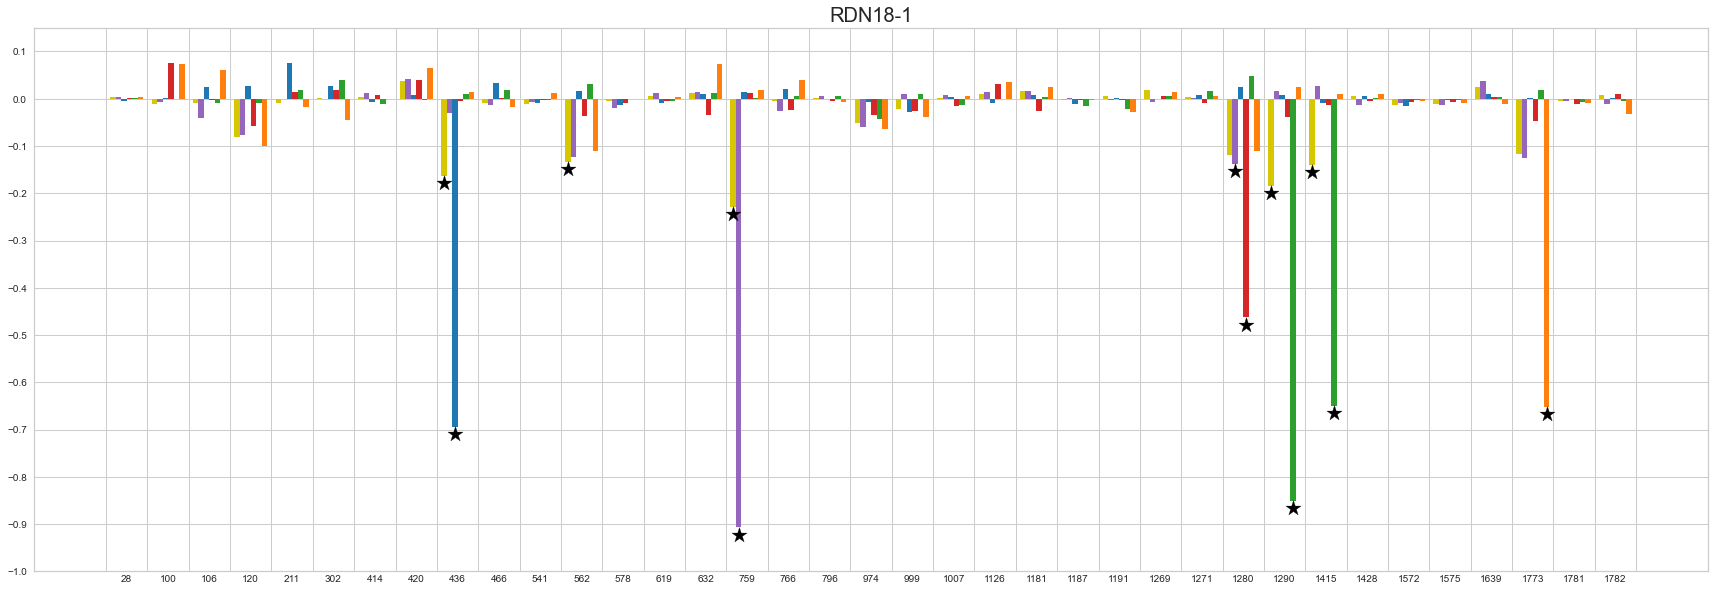

In [13]:
contig = "RDN18-1"
figure_path = f"figures/sno_rna_knockouts/{contig}_snornaKO_bargraph.png"
title = contig
pvalue_cutoff = 0.05
mod_threshold = 0
fig, axs = plt.subplots(1, figsize=(30,10))
axs.set_title(title, fontdict={'fontsize':20})
width = 0.8 / len(all_labels)
tab_colors = ['tab:red', 'tab:blue', 'tab:green', "tab:purple", 'tab:orange', "y", 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i, label in enumerate(all_labels):
    mask = (corrected_pvalues_df["contig"] == contig).values
    y = corrected_pvalues_df[f"{label}_mean"] - corrected_pvalues_df["WT_YPD_mean"] 
    pvalue_mask = (corrected_pvalues_df[f"{label}_corrected_pvalue"] < pvalue_cutoff) * (corrected_pvalues_df[f"{label}_corrected_batch_effect_prob"] <= mod_threshold)    
#     colors = pd.DataFrame(["b" if x else "r" for x in pvalue_mask])
    colors = pd.DataFrame([tab_colors[i] for x in pvalue_mask])
    x = y[mask].index
    y = y[mask]
    c = list(colors[mask][0].values)

    if i == 0:
        x1 = np.array(range(len(x)))+(0.5*width)
    if i == 1:
        x1 = np.array(range(len(x)))-(0.5*width)
    if i == 2:
        x1 = np.array(range(len(x)))+(1.5*width)
    if i == 3:
        x1 = np.array(range(len(x)))-(1.5*width)
    if i == 4:
        x1 = np.array(range(len(x)))+(2.5*width)
    if i == 5:
        x1 = np.array(range(len(x)))-(2.5*width)


    axs.bar(x1, y, width, label=label, color=tab_colors[i])
    axs.scatter(x1[pvalue_mask[mask]], y[pvalue_mask&mask] + (np.sign(y[pvalue_mask&mask]) * 0.015), marker="*", color="black", zorder=10, s=250)
    axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
    axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)

    axs.set_yticks(ticks=np.linspace(-1, 1, num=21, endpoint=True))

    axs.set_xticklabels(labels=x, minor=True)
    axs.set_xticklabels(labels=["" for x in x], minor=False)

#     axs.grid(True, which='minor', axis='x')
    axs.grid(True, which='major')

axs.set_ylim(-1, 0.15)
# plt.legend()

if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()